<a href="https://colab.research.google.com/github/Juanchp00/Teor-a-de-se-ales/blob/main/Teor%C3%ADa_de_se%C3%B1ales_ultima_modificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIBRERIAS


In [6]:
from sympy.solvers import solve_linear_system
from sympy import Symbol
import numpy as np
import sympy as sp
import seaborn as sns
from sympy.solvers import solve
from sympy.matrices import Matrix
from matplotlib import pyplot as plt
from scipy.signal import square, sawtooth
from matplotlib import pyplot as plt
from scipy.signal import lti
from scipy.signal import butter
from scipy.signal import filtfilt, find_peaks
from scipy.fftpack import fft, fftfreq, fftshift
from scipy.signal import hilbert
from scipy.integrate import cumtrapz
from scipy import signal
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 6)
matplotlib.rcParams['figure.dpi'] = 90
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interact 
from sympy.solvers import solve_linear_system 
from sympy import Symbol 
import sympy as sym 
from sympy.matrices import Matrix #Trabajo con matrices

#FUNCIONES

In [102]:
def fft_plot(t, y, wmin=None, wmax=None):
    """
    Esta función recibe una señal (con su vector de tiempo) y gráfica 
    su representación en el tiempo y en la frecuencia.
    
    t:  vector de tiempo
    y: señal
    wmin: frecuencia mínima en la gráfica
    wmax: frecuencia máxima en la gráfica
    
    """
    # La frequencia de muestreo la extraigo del vector del tiempo
    sample_rate = t[1] - t[0]
    
    Y = np.abs(fftshift(fft(y)))  # Valor absoluto de Fourier
    Y = Y / Y.shape[0]  # Normalización
    W = fftshift(fftfreq(Y.shape[0], sample_rate))  # Vector de frecuencias
    
    #  Inicializa la figura con un tamaño y densidad de píxeles cómoda
    plt.figure(figsize=(16, 5), dpi=90)
    
    #  Primer plot
    plt.subplot(121)  # 1 fila, 2 columnas, espacio 1
    plt.plot(t, y, color='C0')
    plt.grid(True)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    
    plt.subplot(122)  # 1 fila, 2 columnas, espacio 2
    plt.plot(W, Y, color='C1')  # grafica el contorno
    plt.fill_between(W, Y, 0, color='C1', alpha=0.3)  # grafica el relleno con una transparencia
    if wmin and wmax:
        plt.xlim(wmin, wmax)
    plt.ylim(0)
    plt.grid(True)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')

def amplitude_discretization(y, bit=2):
    """
    Discretiza una señal en amplitud según un número determinado de bits.
    
    y: señal
    bit: número de bits para usar en la discretización
    
    """
    # El nuevo «alfabeto» de la señal, una lista definida de valores que la señal puede tomar en amplitud
    # la creo rellenando el rango mínimo y máximo con un número finito valores equidistantes
    new_domain = np.linspace(y.min(), y.max(), 2**bit)
    #                                            ^
    # Estoy usando potencias de dos simplemente porque hay unos tipos de modulaciones digitales 
    # en los que se facilita el trabajar con estos tamaños, y porque estamos familiarizados con
    # los conversores análogo-digitales de N-bit
    
    # Aproximo los valores continuos a los mas cercanos de mi nuevo alfabeto.
    y_n = [new_domain[np.abs(new_domain - v).argmin()] for v in y]
    
    return np.array(y_n)  # retorna la señal discretizada

def lti_simulation(lti, t, x):
    """
    lti: lti system, lo que retorna scipy
    t: vector de tiempo
    x: señal de entrada

    """
    t_, output_, _ = lti.output(x, t)
    
    return t_, output_  # retorna el mismo vector de tiempo y y la señal resultante

def normalization(signal):
    """
    Normaliza la señal, dejándola únicamente positiva y variando de 0 a 1
    
    signal: señal
    """
    signal_ = signal.copy()
    signal_ -= signal_.min()  # Se desplaza para que únicamente sea positiva
    signal_ /= signal_.max()  # Se divide por el máximo, para que el dominio sea de 0 a 1
    
    return signal_

def normalization1(signal):
  """
  Normaliza la señal, dejándola únicamente positiva y variando de 0 a 1
   
  signal: señal
    """
  signal_ = signal.copy()
  signal_ = signal_ / signal_.max()  # Se divide por el máximo, para que el dominio sea de 0 a 1
  return signal_  

def pulse_train(t, pulses=10):
    """
    Define un tren de pulsos.
    
    t: vector de tiempo
    pulses: número de pulsos
    
    """
    width = (t.max()-t.min())/(pulses)
    
    return t, np.array(t%width*2<(width), dtype=np.int)


def error_cuadratico(signal1,signal2,n):
  error=0
  for i in range(n):
    error = error + (signal1[i] - signal2[i])**2
  error = error/n
  return error

def prob(A,b):
  return A[map_(b,-0.25,1.25,0,x1.size)]

def prob_conjunta (a,b):
  return prob(A1,a)*prob(B1,b)

def prob_condicional(a, b, cond):
  if cond == 'inputn':
    return prob_conjunta(a,b) / prob(A1,a)
  elif cond == 'output':
    return prob_conjunta(a,b) / prob(B1,b)

def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



#Respuesta al circuito

In [22]:
R1 = Symbol('R1')
R2 = Symbol('R2')
C = Symbol('C')


I1 = Symbol('I1')
x = Symbol('x')
jw = Symbol('jw')

**Pasando circuito a matriz**

In [23]:
M = Matrix([[(1/(C*jw))+R2+R1]])
I = Matrix([I1])
V = Matrix([x])
M

Matrix([[R1 + R2 + 1/(C*jw)]])

In [24]:
I

Matrix([[I1]])

In [25]:
V

Matrix([[x]])

**Resultado función de transferencia**

In [26]:
solution = solve_linear_system(M.col_insert(1,V), *I)
solution
Y = R1*solution[I1] 
S = M*Matrix(list(solution.values()))
X = S.row(0).col(0) #Fila 0 y columna 0 de la matriz S.
H = Y/X[0,0] 
Hs = H.simplify()
Hs

C*R1*jw/(C*jw*(R1 + R2) + 1)

**Asignamos valor a los elementos**


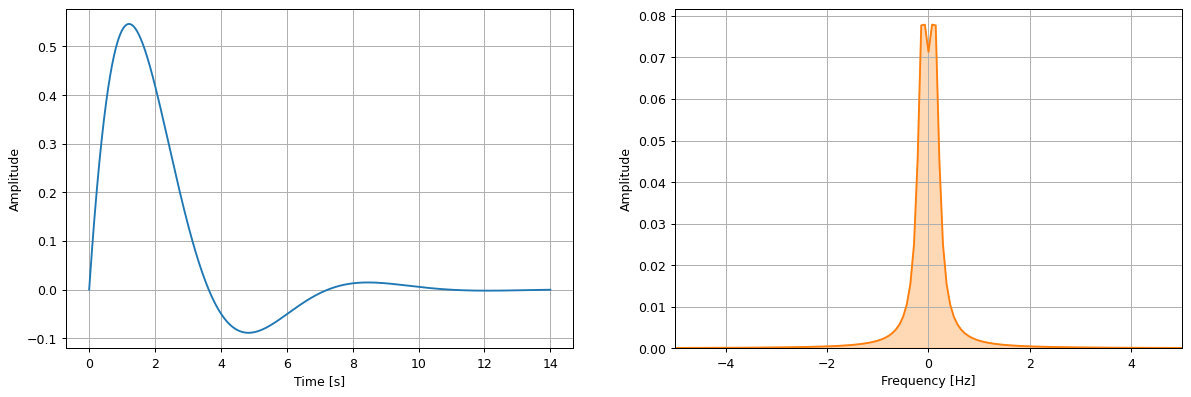

In [27]:
c1=1
r1=1
r2=1

#Encontramos respuesta al impulso
n1=c1*r1
n2=c1*r2
num = [n1,] # b1
den = [n1, n2,1] #a2,a1, a0
t = np.linspace(0, 10, 2000)
lti_system = lti(num, den)
t, h=lti_system.impulse(N=2000)
fft_plot(t,h,-5,5)

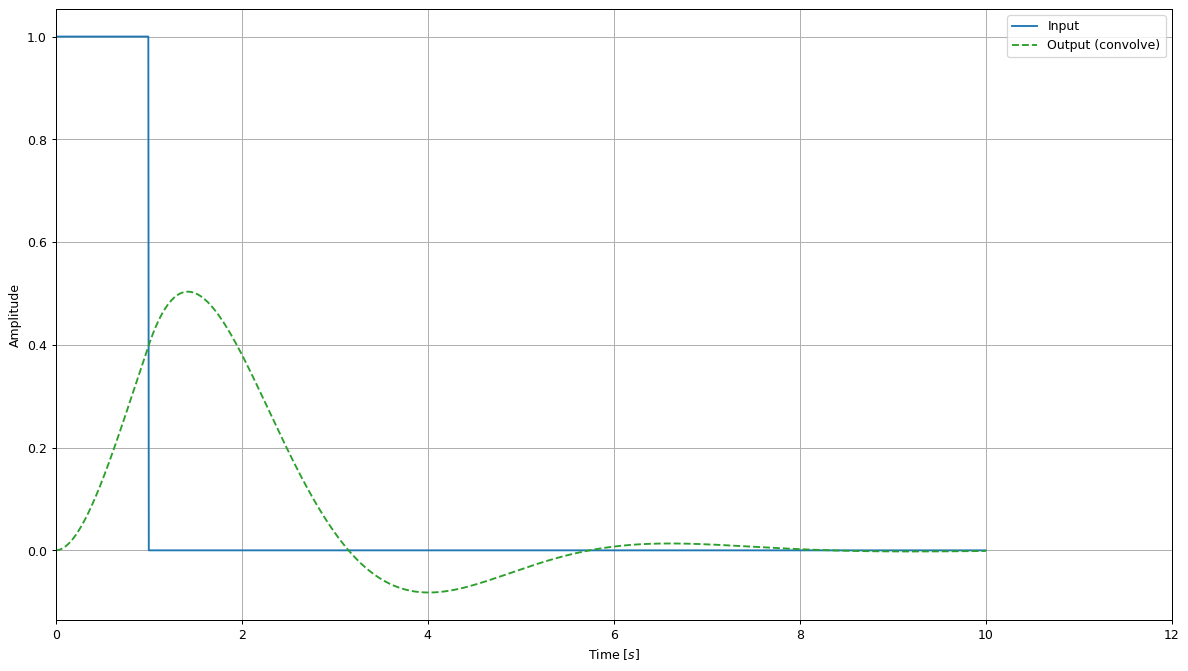

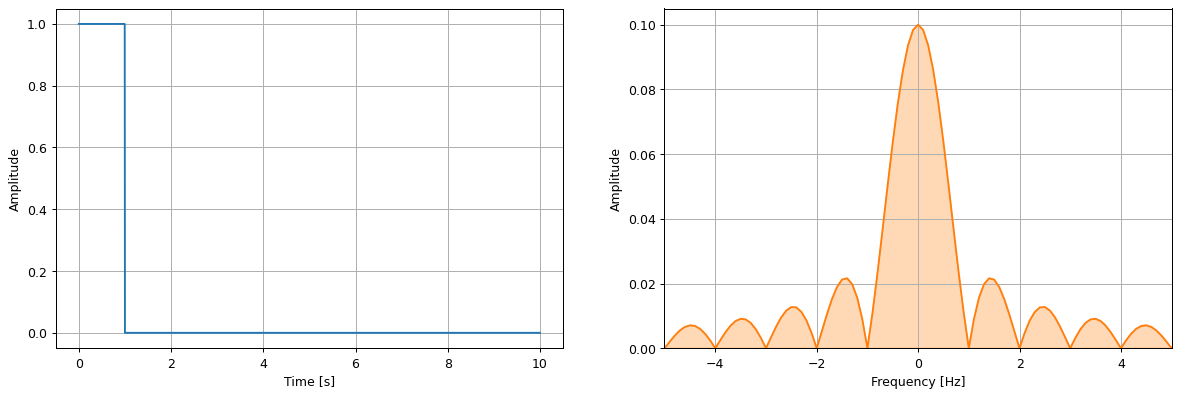

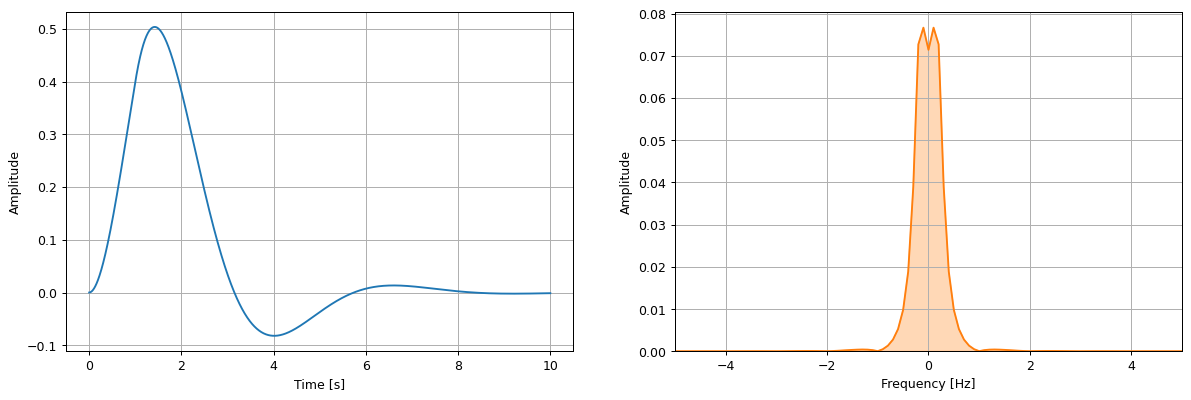

In [28]:
#Encontramos respuesta a la salida tras convolución
t = np.linspace(0, 10, 2000)
input_=np.array([1]*200+[0]*1800)
_, output_, _ = lti_system.output(input_, t)
output_c = np.convolve(input_, h)[:t.shape[0]]*((t[-1]/t.shape[0]))

plt.figure(figsize=(16,9),dpi=90)
plt.plot(t, input_, '-', C='C0', label='Input')
plt.plot(t, output_c, '--', C='C2', label='Output (convolve)')

plt.grid(True)
plt.legend()
plt.xlim(0, 12)
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')
plt.show()

#Señal a la entrada
fft_plot(t,input_,-5,5)

#Señal a la salida  
fft_plot(t,output_c,-5,5)

#Modulaciones 

##Parametros para las modulaciones

**Definimos portadoras**

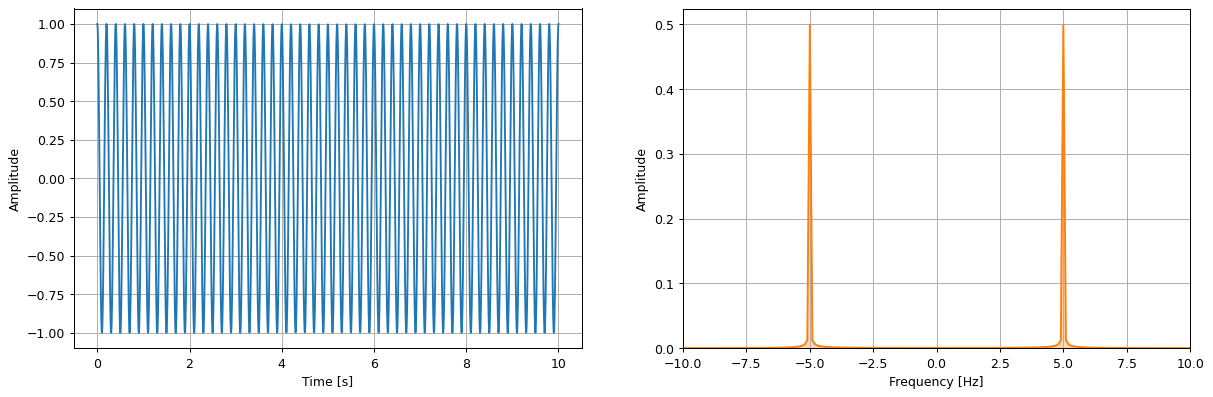

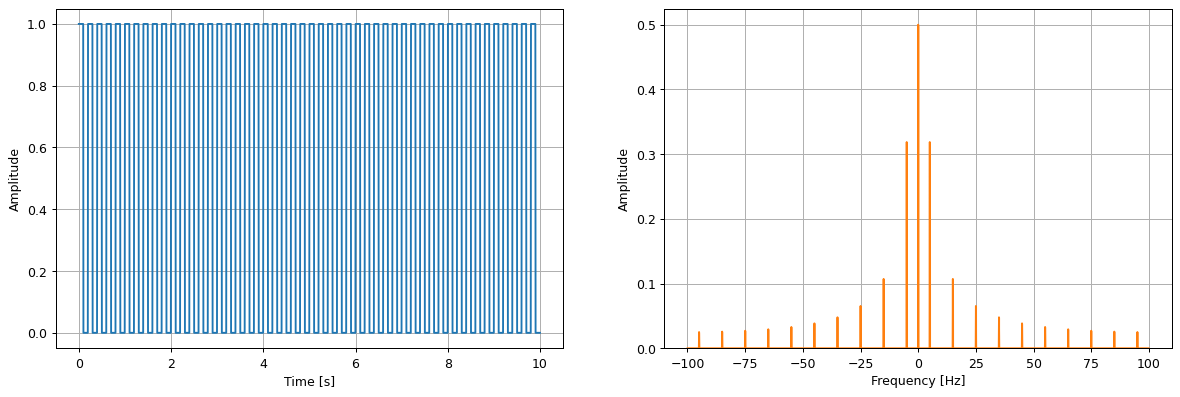

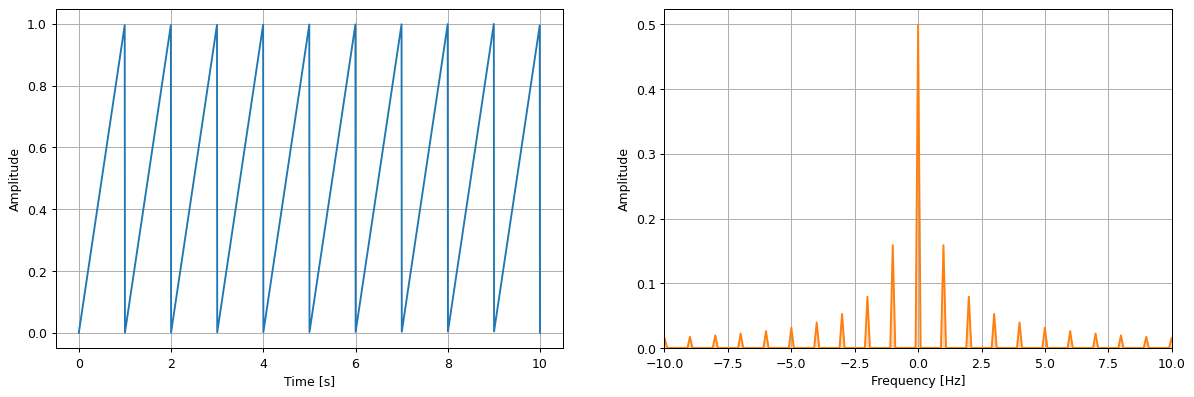

In [45]:
#Portadora sinusoidal
fp=5
portadora=np.cos(2*np.pi*fp*t)
fft_plot(t,portadora,-fp-5,fp+5)

#Tren de pulsos
pulses = 50
t, tren = pulse_train(t, pulses)
fft_plot(t, tren)

#diente de sierra
lp = l - min(l)
diente_sierra = (np.max(lp))*(signal.sawtooth( 2* np.pi*t)+1)/2
fft_plot(t, diente_sierra, -10, 10)

**Definimos moduladora (normal y normalizada)**

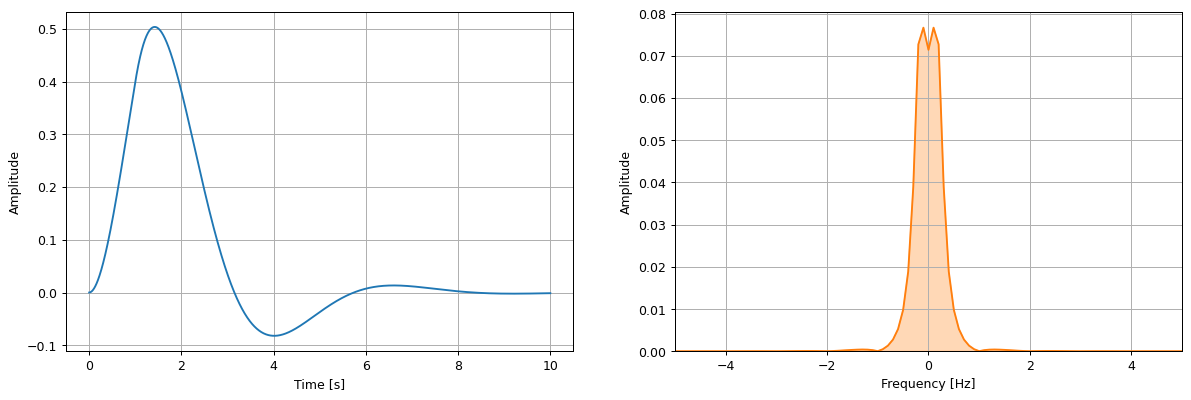

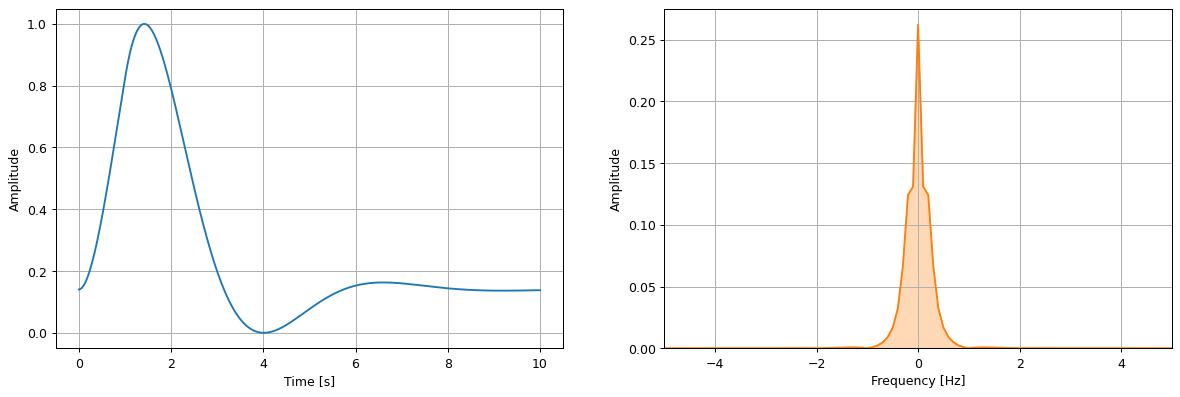

In [31]:
#Moduladora normal
fft_plot(t,output_c,-5,5)

#Moduladora normalizada
l=normalization(output_c)#Se normaliza la salida del circuito
fft_plot(t,l,-5,5)

##Modulación de amplitud AM


###Modulación de doble banda lateral con portadora suprimida (DSB-SC)

$$y(t)=a(t)cos(w_ct)$$

En donde

$$a(t)\sim  kx(t)+k_d \hspace{1cm} k,k_d=cte$$

Para esta modulación se asume $k_d=0$ por lo que se tiene

$$y(t)=x(t)cos(w_ct)$$

Cuya densidad espectral esta dada por

$$Y(w)=F(y(t))=\frac{X(w+w_c)+X(w-w_c)}{2}$$

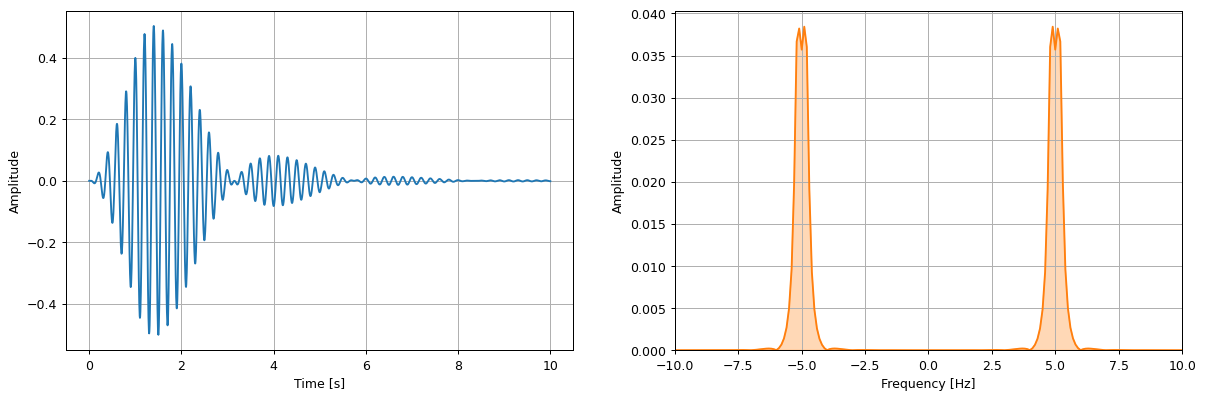

In [35]:
u = 1

DSBSC = output_c*portadora*u

fft_plot(t, DSBSC, -10,10)

###Modulación de doble banda lateral con gran portadora (DSB-LC)

Se obtienen, si se asume una constante de desplazamiento $k_d$ diferente de cero, por lo que la señal modulada sería

$$y(t)=x(t)cos(w_ct)+k_dcos(w_ct)$$

donde, la correspondiente densidad espectral estaría dada por

$$Y(w)=\frac{1}{2}X(w+w_c)+\frac{1}{2}X(w-w_c)+k_d \pi \frac{1}{2}\delta(w+w_c)+k_d \pi \frac{1}{2}\delta(w-w_c)$$

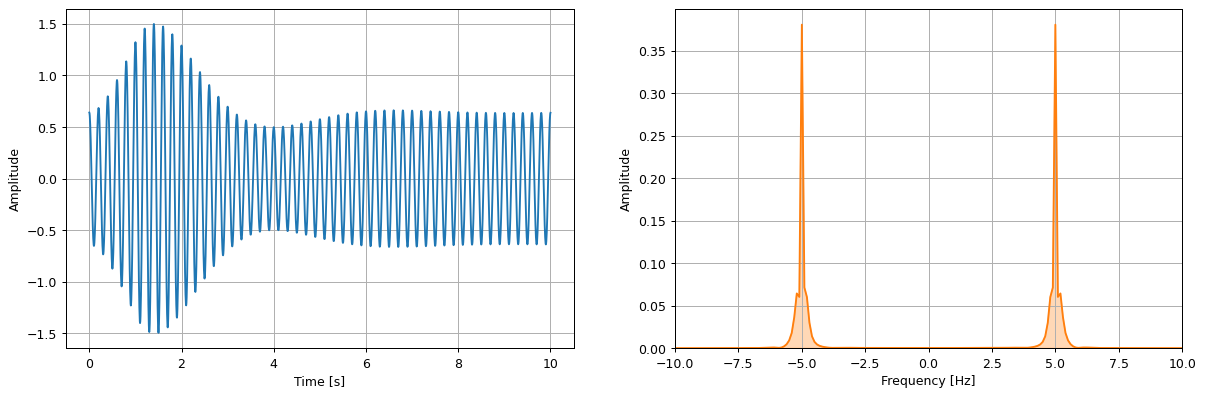

In [36]:
u = 1
kd=0.5
DSBLC = u*(l*portadora+kd*portadora)

fft_plot(t, DSBLC, -10,10)

###Modulación de banda lateral única (SSB)
Se basa transmitir el mensaje utilizando solo una de las bandas laterales, se toma una señal DSB de la cual se suprimeuna de las bandas laterales con un filtro.

$$y(t)=x(t)cos(w_ct) \mp \hat x(t)sin(w_ct)$$

Donde la suma representa la banda lateral inferior

$$y(t)=x(t)cos(w_ct)+\hat x(t)sin(w_ct)$$

mientras que la diferencia, representa la banda lateral superior

$$y(t)=x(t)cos(w_ct) - \hat x(t)sin(w_ct)$$

La densidad espectral sería

$$F(y(t))=F(x(t)cos(w_ct)) \mp F(\hat x(t)sin(w_ct))$$
$$Y(w)= \frac{1}{2}X(w-w_c)+\frac{1}{2}X(w+w_c)-(\frac{1}{2j}\hat X(w-w_c)-\frac{1}{2j}\hat X(w+w_c))$$

En donde 

$$\hat X(w \mp w_c)=-jsgn(w \mp w_c)X(w \mp w_c)$$

por lo que 

$$Y(w)= \frac{1}{2}X(w-w_c)(1+sgn(w - w_c))+\frac{1}{2}X(w+w_c)(1-sgn(w + w_c))$$

sabiedo que la funcion signo es

$$sgn(w-wc)=\left\{\begin{matrix}
1 ; w>w_c\\ 
0 ; w<w_c
\end{matrix}\right.$$

En este caso 

$$1 \mp sgn(w-wc)=\left\{\begin{matrix}
2 ; w> \mp w_c\\ 
0 ; w< \mp w_c
\end{matrix}\right.$$

y por lo tanto

$$Y(w)=\left\{\begin{matrix}
0 \hspace{3cm}   ; |w|>w_c\\ 
X(w+w_c) \hspace{1cm} ; w<-w_c\\
X(w-w_c) \hspace{1cm} ; w>w_c
\end{matrix}\right.$$

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


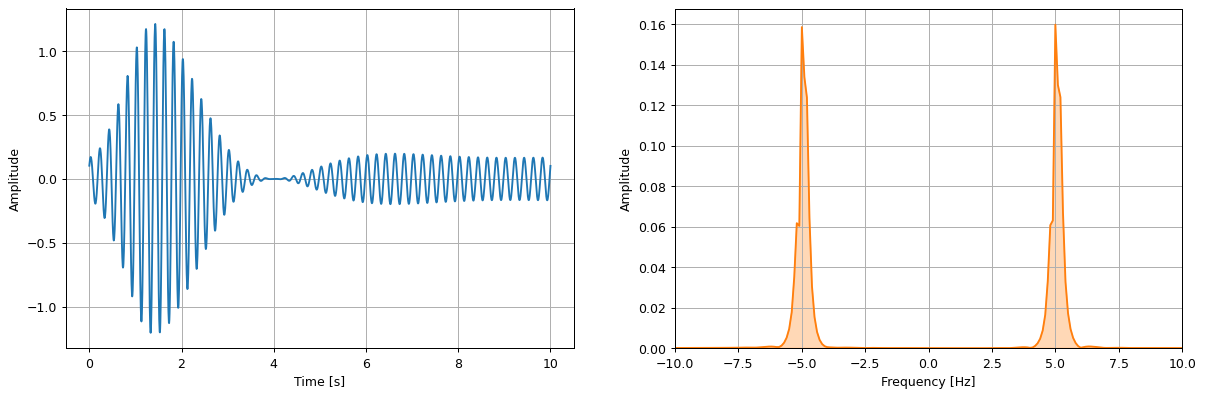

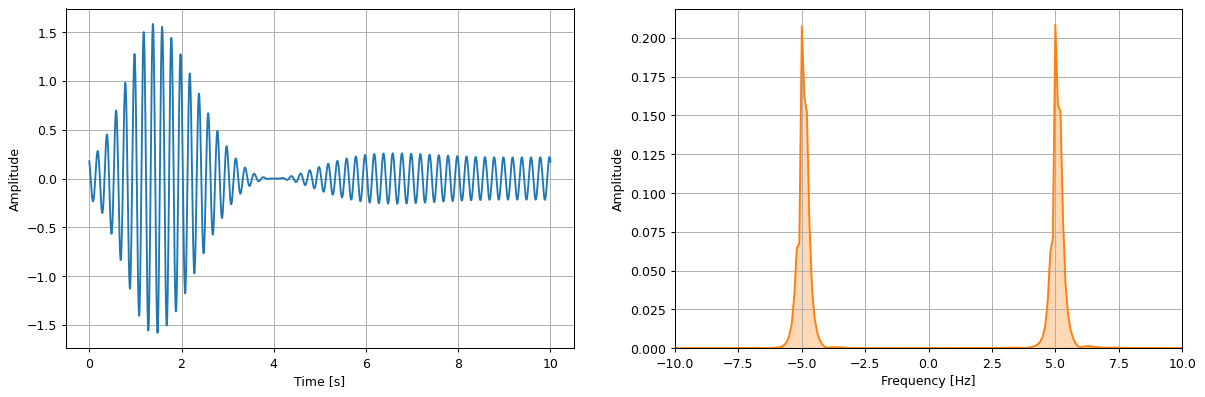

In [39]:
from scipy.signal import hilbert

segport= np.cos(2*np.pi*fp*(t+np.pi))

um=1
DSBSCm = l*portadora*um

#banda lateral superior 
SSBS= DSBSCm + um*hilbert(l)*segport
fft_plot(t, SSBS, -10, 10)

#banda lateral inferior 
SSBI= DSBSCm - um*hilbert(l)*segport
fft_plot(t, SSBI, -10, 10)

### Modulación de banda lateral vestigial (VSB)##

La modulación de banda lateral vestigial consiste en filtrar la señal resultantes de una modulación en doble banda lateral (DSB) con un filtro especial (vestigial), la cual permite el paso de una pequeña parte de la banda lateral inferior (o superior) y una parte mucho mayor de la banda lateral superior (o inferior). 


$Y_{VSB}(\omega)= Y_{DSB}(\omega)H_{VSB}(\omega)$

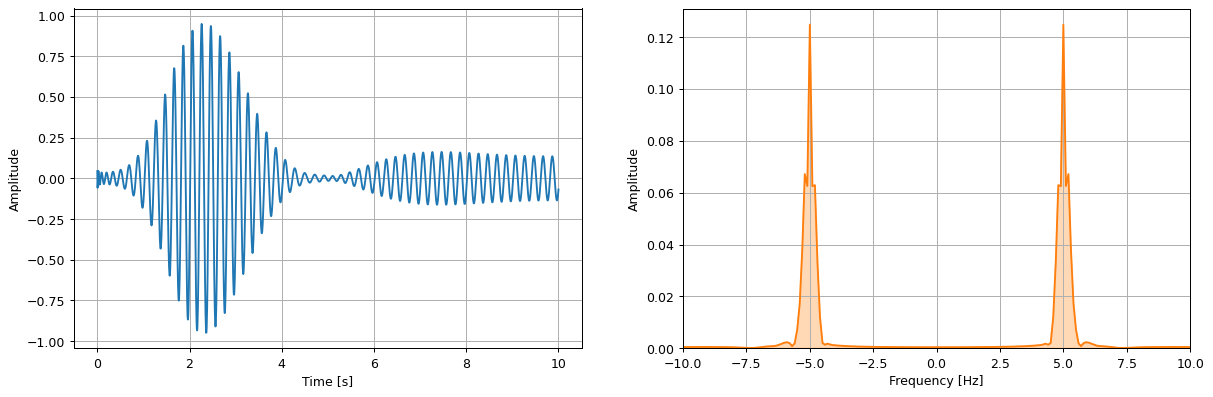

In [41]:
HVSB = signal.butter(25, 8,'hp',fs=350,output='sos')
filtrado = signal.sosfilt(HVSB, DSBSCm)
fft_plot(t,filtrado,-10,10)

##Modulación de Frecuencia (FM)

En este caso la señal modulada mantendrá fija su amplitud y el parámetro de la señal portadora que variará es la frecuencia, y lo hace de acuerdo a como varíe la amplitud de la señal moduladora.

se denota con la formula 
$$y_{FM}(t)=a cos(\omega_c t+k_f \int_t x(\tau) d\tau +\phi_0)$$



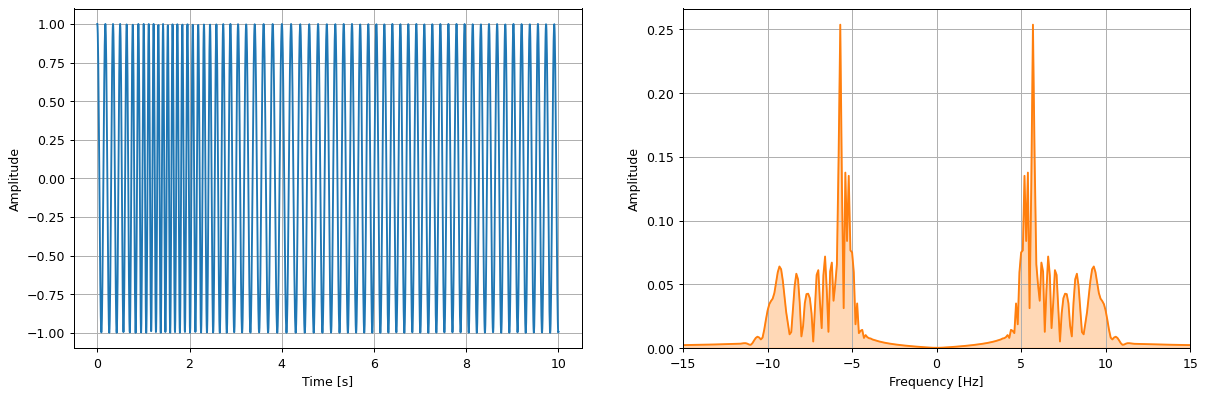

In [42]:
beta = 30

fm = np.cos(2*np.pi*fp*t + beta*cumtrapz(l, t, initial=0))

fft_plot(t, fm, -15, 15)

## Narrow Band

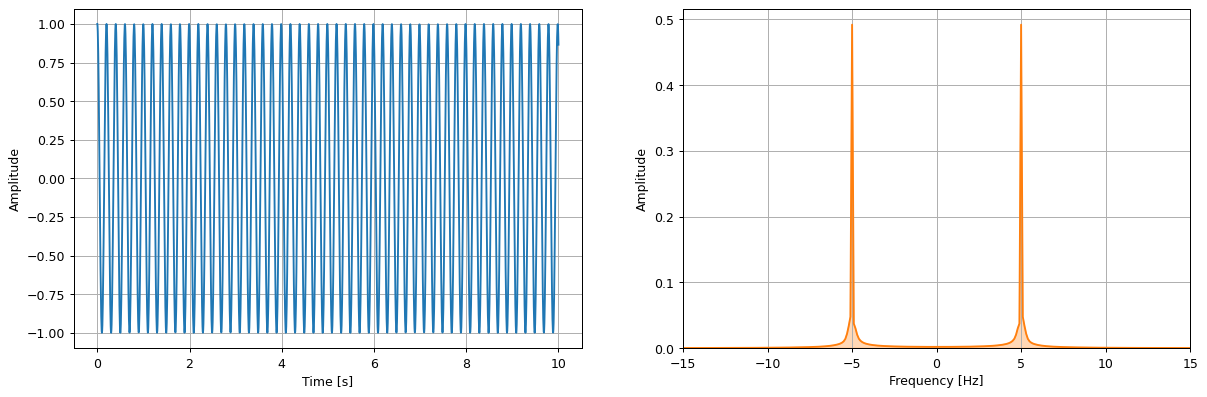

In [49]:
##NBFM
beta = 0.2

nbfm = np.cos(2*np.pi*fp*t + beta*cumtrapz(l, t, initial=0))

fft_plot(t, nbfm, -15, 15)

##Modulaciones de pulsos

###Modulación por amplitud de pulso (PAM)

para este caso la señal portadora consiste en un tren de pulsos y la modulación se basa en variar algún parámetro de la señal portadora.

La modulación por amplitud de pulso consiste en la multiplicacion de la señal analogica contínua del mensaje, por un tren de pulsos cuadrados constantes en amplitud, de donde se modula la amplitud de acuerdo al mensaje a enviar

$$y_{PAM}(t)=\sum_K x(KT)rect_\tau (t-KT)$$

donde T es el periodo de muestreo, $x(KT)$ es el valor muestreado de $x(t)$ obteido en el tiempo $t=KT$ y la sumatoria de las funciones $rect_\tau (t)$ representan el tren de pulsos de amplitud $1$ y duracion $\tau$.

También se puede encontral la señal modulada realizando la convolucion entre el mensaje muestreado instantaneamente $x(t)$ y el pulso rectangular $rect_\tau (t)$, donde, el mensaje muestread de forma instantanea esta dado por

$$x_\delta (t)=\sum_K x(KT) \delta (t-KT)$$

entonces

$$y_{PAM}(t)=x_\delta (t)*rect_\tau (t)=\sum_K x(KT)rect_\tau (t-KT)$$

La densidad espectral se encuentra aplicando la propiedad de la transformada de Fourier para la convolución

$$F(y_{PAM}(t))=F(x_\delta (t)*rect_\tau (t))=X_\delta (w) F(rect_\tau (t))$$
$$Y_{PAM}(w)= \frac{\tau}{T} \sum_K X(w-Kw_o) sinc(w \frac{\tau}{2}) $$

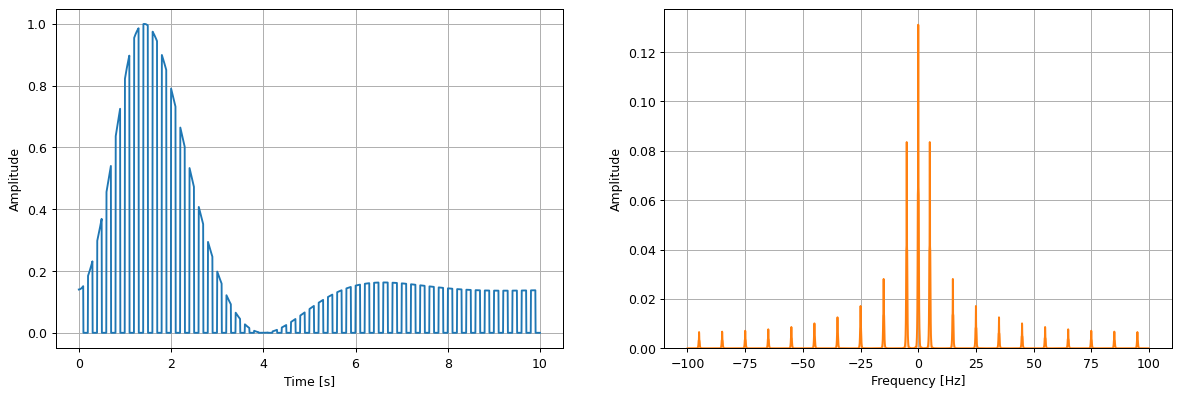

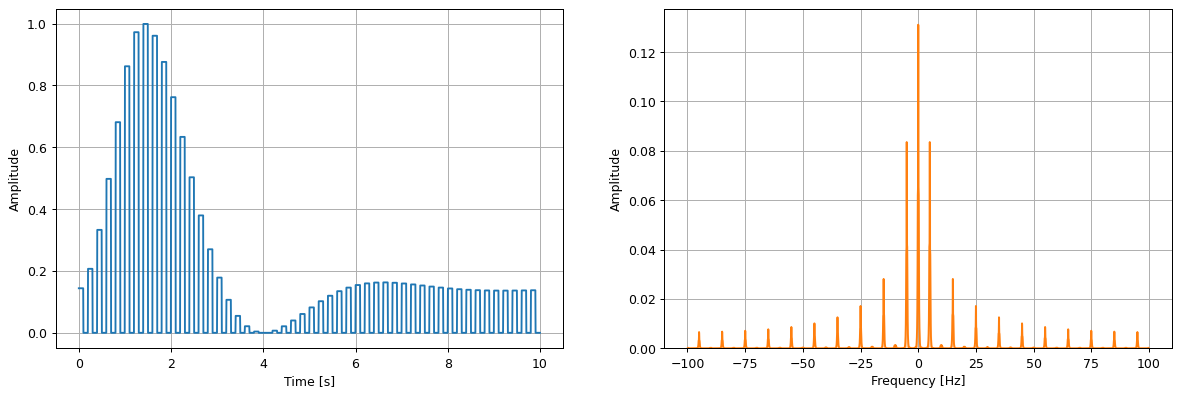

In [44]:
#muestreo natural
PAMN = tren * l
fft_plot(t, PAMN)

#muestreo con pulsos de amplitud plana
PAMR = np.array([[pulse.mean()]*pulse.shape[0] for pulse in PAMN.reshape(-1, PAMN.shape[0]//(pulses*2))]).reshape(-1, )
fft_plot(t, PAMR)

###Modulacion por ancho de pulso (PWM)
La modulación por ancho de pulso (PWM) consiste en variar la duracion de los pulsos de la portadora (Tren de pulsos), según la forma que tenga la señal moduladora.

La generación tanto de la modulacion por ancho de pulso, como la modulación por posición de pulsos posteriormente mencionada consiste en la comparación de la señal moduladora con una señal diente de sierra, en donde

La modulación por ancho de pulsos, compara la distancia entre el comienzo de periodo de la señal diente de cierra hasta la intersección que tiene esta con la señal moduladora, representando este ancho como el ancho de cada pulso, es decir, entre mayor sea la amplitud de la señal moduladora, mayor ancho tendra el pulso de la portadora.

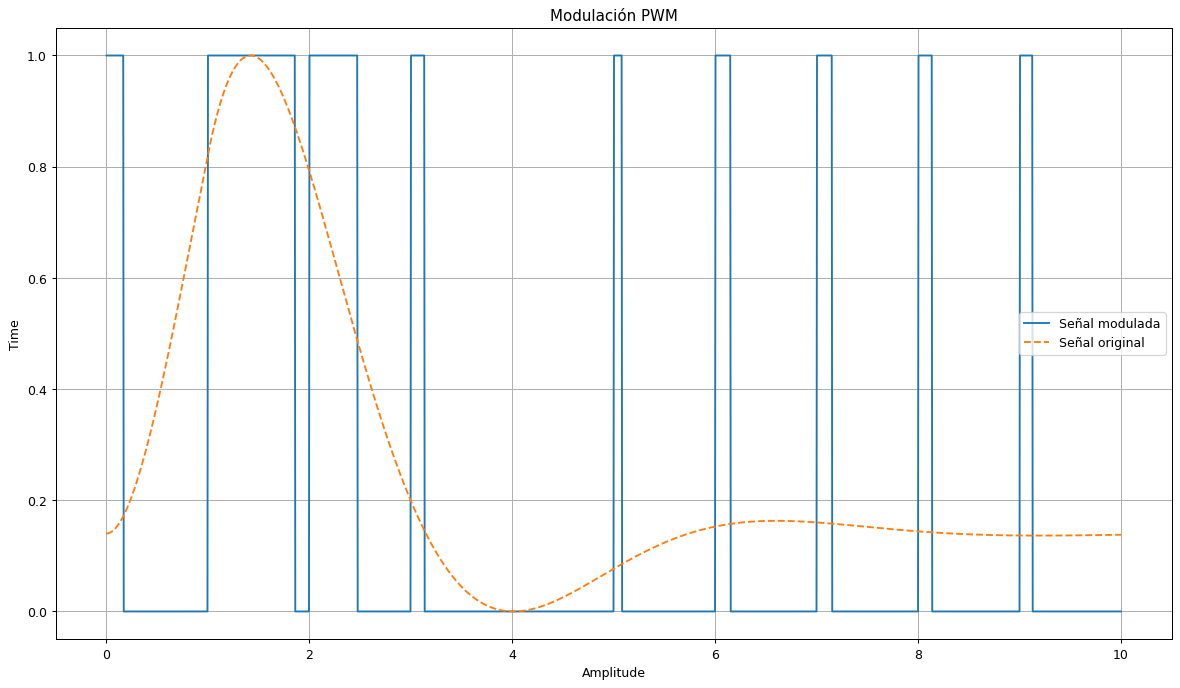

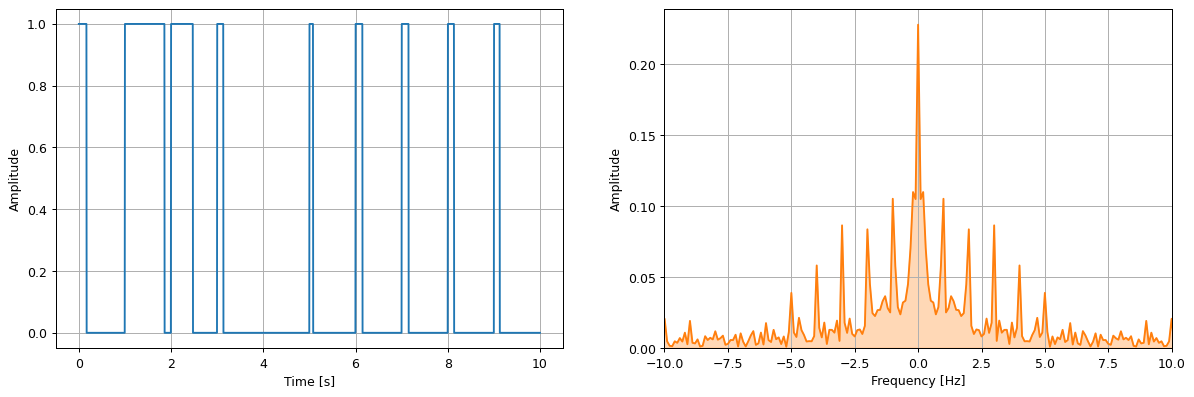

In [47]:
comparation = diente_sierra - lp
comparation = np.abs(comparation)
fig,ax = plt.subplots((1),figsize=(16, 9), dpi=90)
lista = []
PWM = np.zeros_like(lp)
PPM = np.zeros_like(lp)
for i in range(0,10):
  index = 200*i
  index2= 200*(i+1)
  lista.append(np.argmin(comparation[index+1:index2]))
  PWM[index:lista[i]+(200*i)] = np.max(lp)
  PPM[lista[i]+(200*i):lista[i]+(200*i) + 20] = np.max(lp)

ax.title.set_text("Modulación PWM")
ax.plot(t, PWM, '-', label="Señal modulada")
ax.plot(t, lp, '--', label="Señal original")
# plt.plot(t, abs(lp), '--')
ax.set_xlabel('Amplitude')
ax.set_ylabel('Time')
ax.grid(True)
ax.legend()

plt.plot()

fft_plot(t, PWM, -10, 10)

### Modulacion por posicion de pulso (PPM)
En la modulación por posición de pulso, la amplitud y el ancho de la portadora (tren de pulsos) son fijos, sin embargo, la posición es variable, estos pulsos de igual ancho y amplitud tendran su posición por cada periodo, en el corte de la señal moduladora con la señal diente de sierra.

Para modular correctamente la señal el mínimo desplazamiento de pulso, designa el mínimo valor de la señal moduladora y el cambio de posición es proporcional a la señal moduladora.

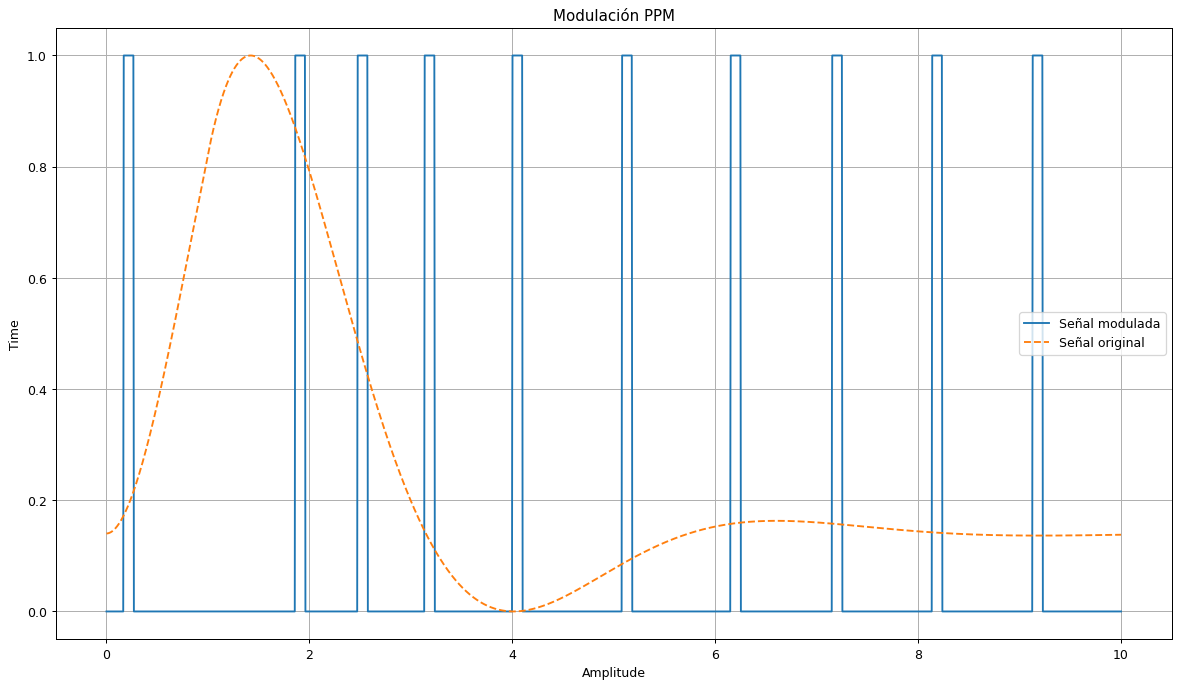

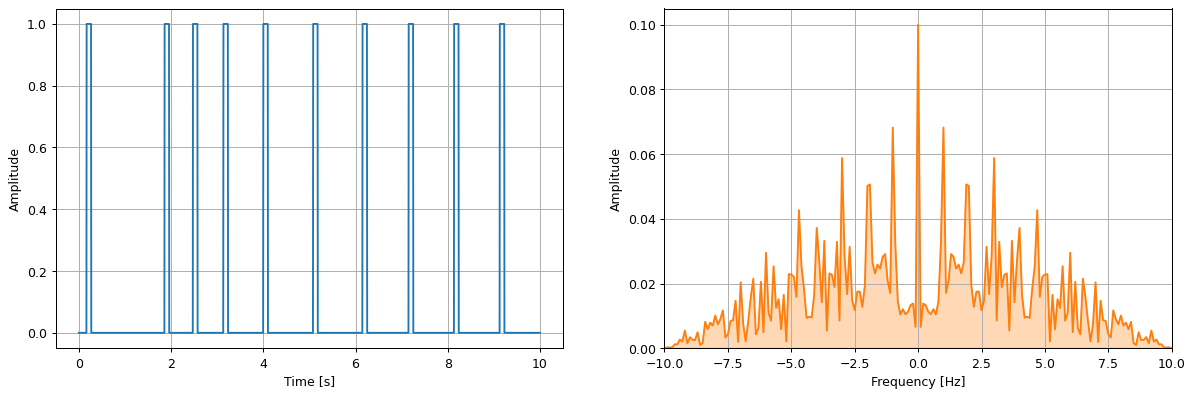

In [48]:
fig,ax = plt.subplots((1),figsize=(16, 9), dpi=90)
ax.title.set_text("Modulación PPM")
ax.plot(t, PPM, '-',label="Señal modulada")
ax.plot(t, lp, '--', label="Señal original")
# plt.plot(t, abs(lp), '--')
ax.set_xlabel('Amplitude')
ax.set_ylabel('Time')
ax.grid(True)
ax.legend()

plt.plot()
fft_plot(t, PPM, -10, 10)

#Demodulaciones

##Parametros antes de las demodulaciones

###Señal con ruido 

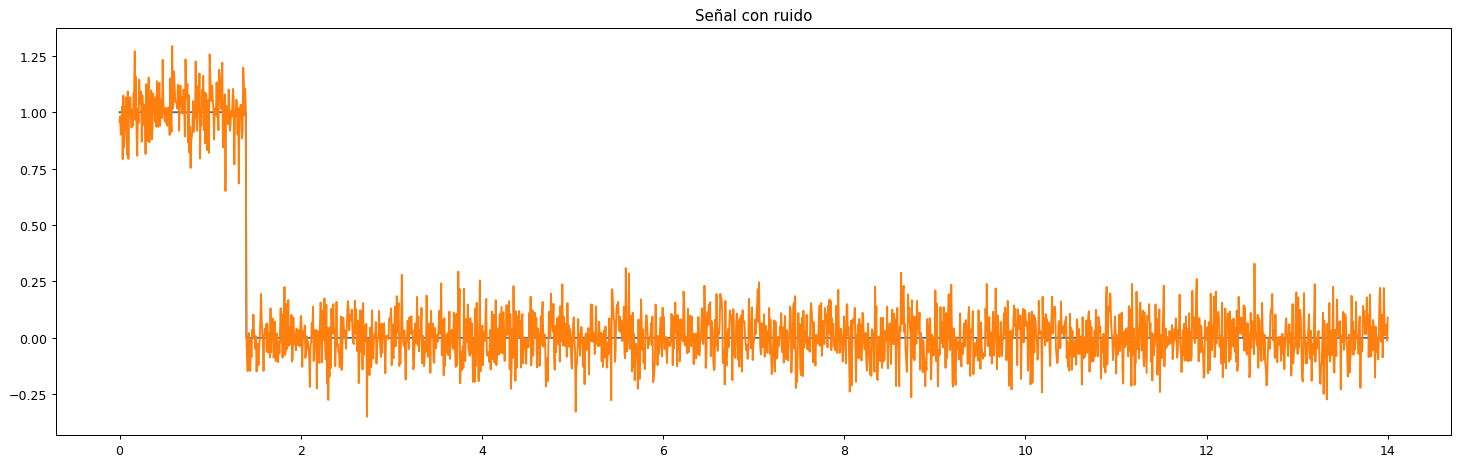

In [95]:
#señal
c1=1
r1=1
r2=1

n1=c1*r1
n2=c1*r2
num = [n1,] # b1
den = [n1, n2,1] #a2,a1, a0
t = np.linspace(0, 10, 2000)
lti_system = lti(num, den)
t, h=lti_system.impulse(N=2000)

input_=np.array([1]*200+[0]*1800)
_, output_, _ = lti_system.output(input_, t)
output_s = np.convolve(input_, h)[:t.shape[0]]*((t[-1]/t.shape[0]))

plt.plot(t,input_)
plt.title("Señal")
plt.grid()

#señal con ruido
noise = np.random.normal(0,0.1,len(t))
inputn = input_ + noise

_, output_, _ = lti_system.output(inputn, t)
output_sn = np.convolve(inputn, h)[:t.shape[0]]*((t[-1]/t.shape[0]))

plt.plot(t,inputn)
plt.title("Señal con ruido")
plt.grid()

(0.0, 10.0)

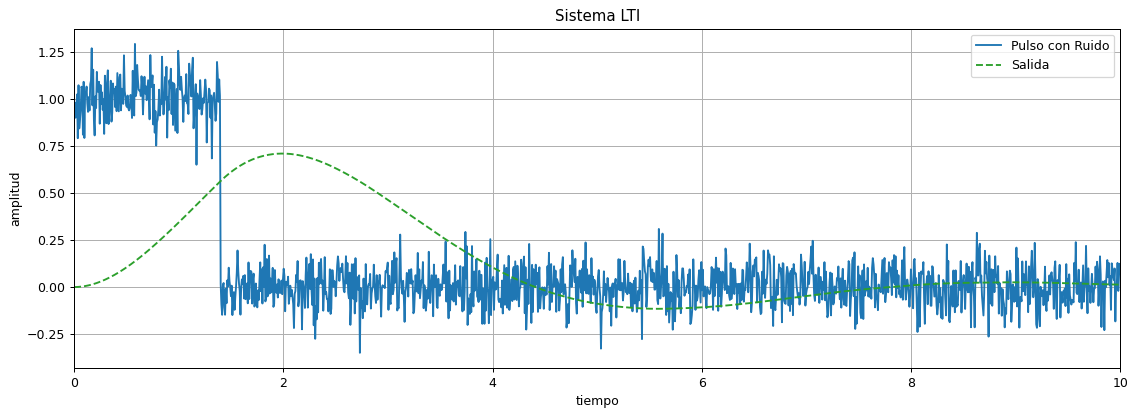

In [96]:
#Sistema LTI
plt.figure(figsize=(15,5), dpi=90)
plt.title("Sistema LTI")
plt.plot(t, inputn,label="Pulso con Ruido")
plt.plot(t, output_sn,'--', C='C2', label='Salida')
plt.legend()
plt.xlabel("tiempo")
plt.ylabel("amplitud")
plt.grid(True)
plt.xlim(0,10)

###Media, Varianza y Correlaciones

####Sin Ruido Blanco

In [97]:
#Media y varianza
var = np.var(output_s)
mean = np.mean(output_s)
print("La media es: ", mean)
print("La varianza es: ", var)

La media es:  0.09995919633309132
La varianza es:  0.0516145269151604


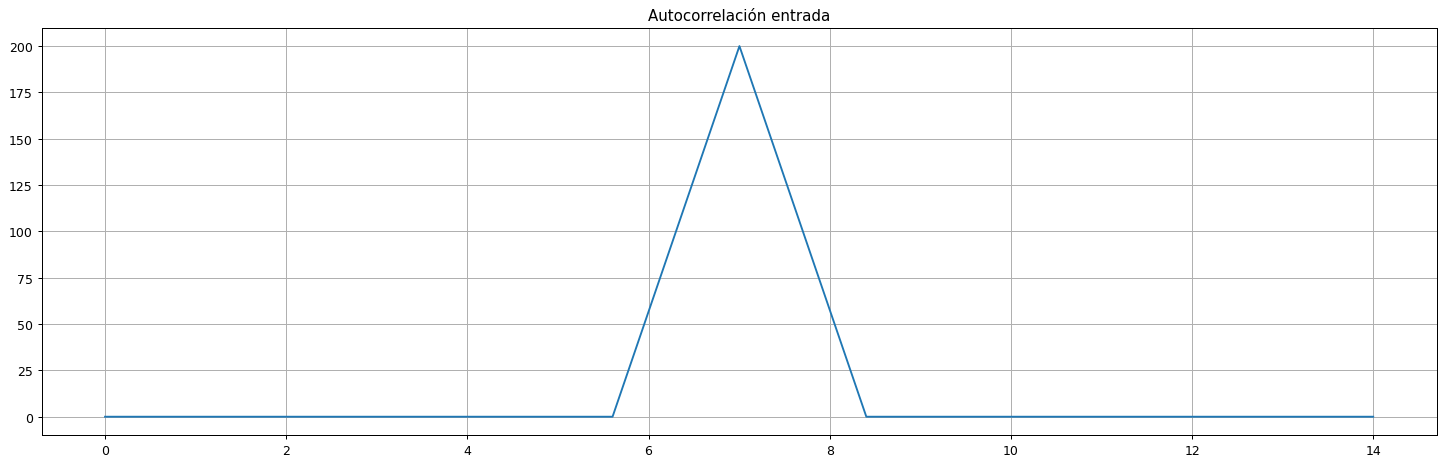

In [98]:
#Autocorrelación entrada
acorrelatione = signal.correlate(input_,input_,mode='same')
plt.title("Autocorrelación entrada")
plt.plot(t,acorrelatione)
plt.grid()

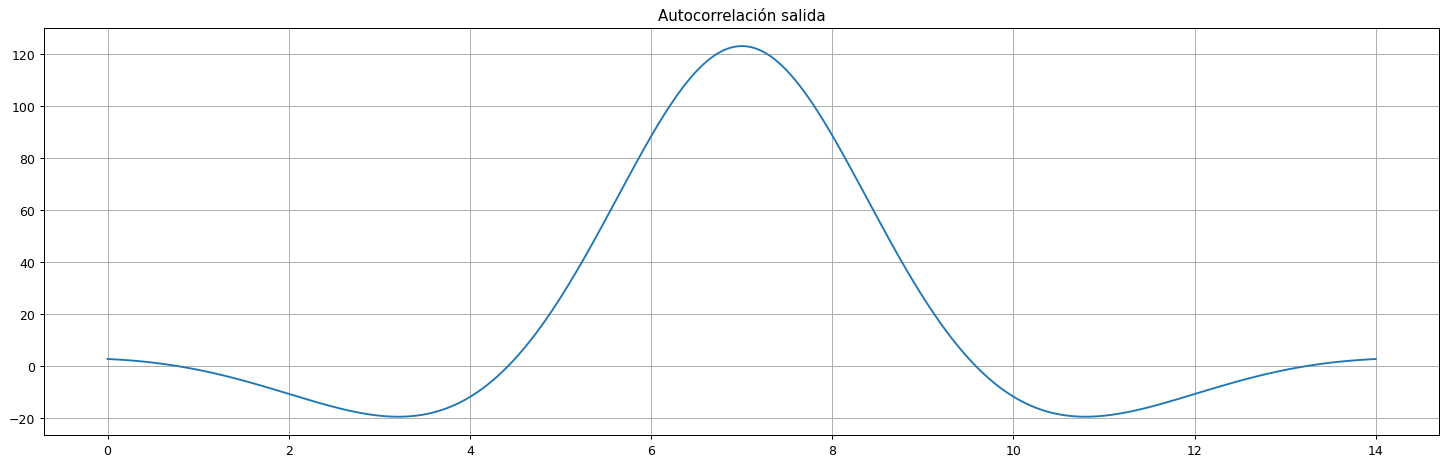

In [99]:
#Autocorrelación salida
acorrelations = signal.correlate(output_s,output_s,mode='same')
plt.title("Autocorrelación salida")
plt.plot(t,acorrelations)
plt.grid()

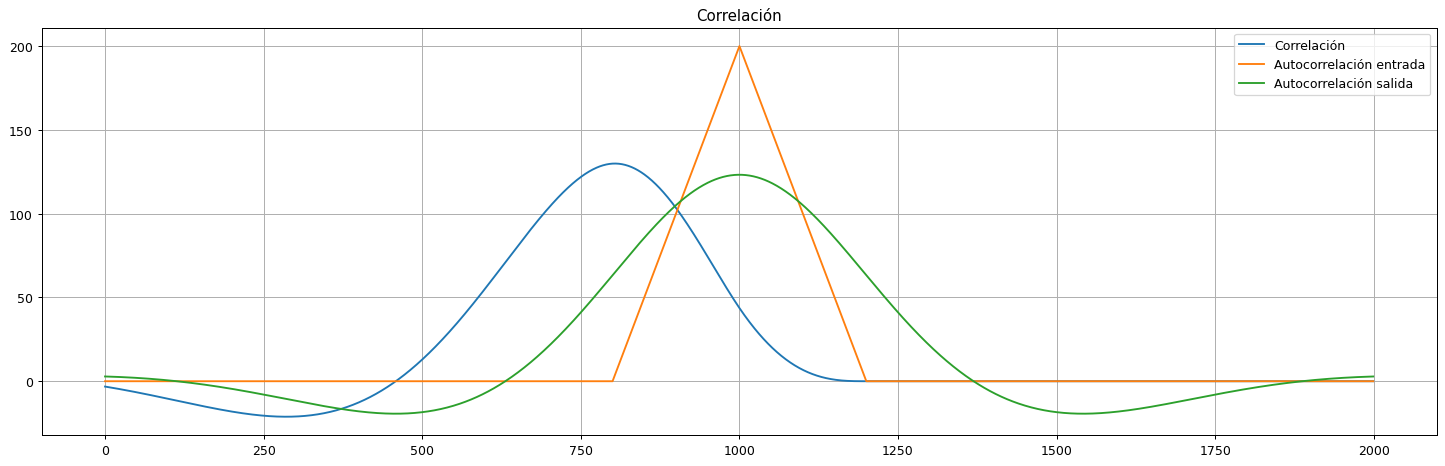

In [100]:
#Correlación 
correlationc = signal.correlate(input_,output_s,mode='same')
plt.title("Correlación")
plt.plot(correlationc, label='Correlación')
plt.plot(acorrelatione, label='Autocorrelación entrada')
plt.plot(acorrelations, label='Autocorrelación salida')
plt.legend()
plt.grid()

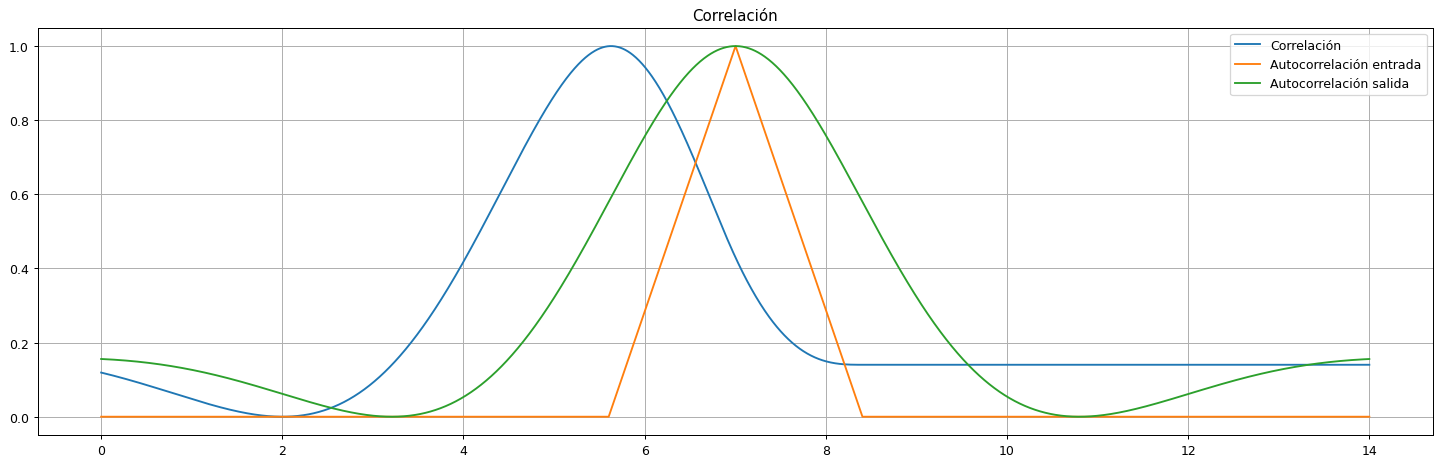

In [134]:
#Correlación normalizada

correlationcn = signal.correlate(input_,output_s,mode='same')
plt.title("Correlación")
cn=normalization(correlationcn)
acs=normalization(acorrelations)
ace=normalization1(acorrelatione)
plt.plot(t,cn, label='Correlación')
plt.plot(t,ace, label='Autocorrelación entrada')
plt.plot(t,acs, label='Autocorrelación salida')
plt.legend()
plt.grid()

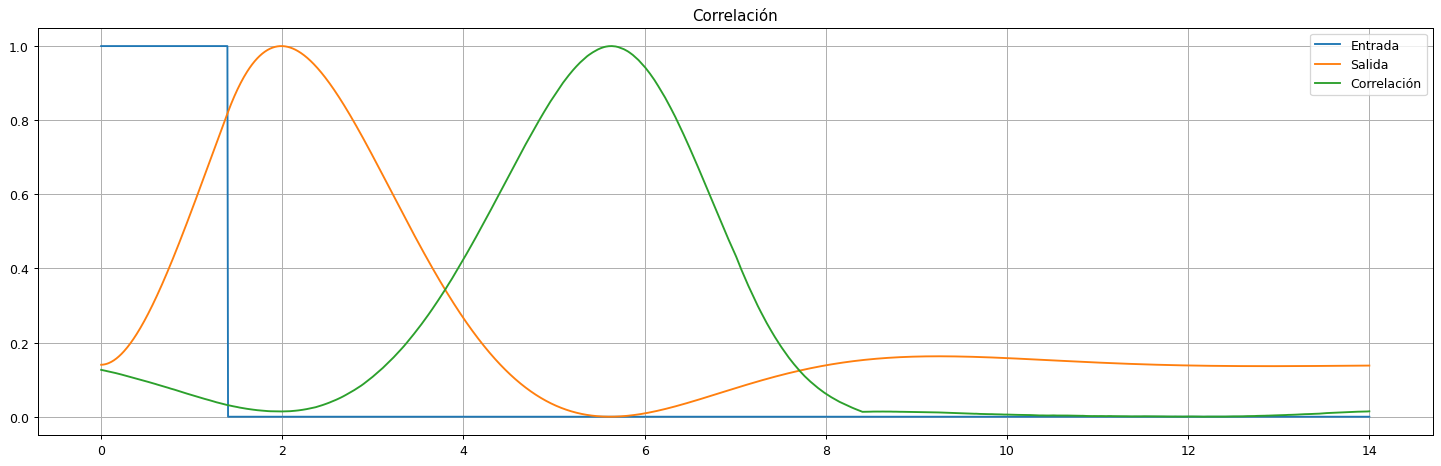

In [135]:
#Correlación viendo entrada y salida
correlationn = np.correlate(input_,normalization(output_s), mode='same')
c=normalization(correlation)
plt.title("Correlación")
plt.plot(t,input_, label='Entrada') 
plt.plot(t,normalization(output_s), label='Salida') 
plt.plot(t,c, label='Correlación')
plt.legend()
plt.grid()

In [136]:
#Indice correlación  
import scipy.stats
scipy.stats.spearmanr(input_, output_s)

SpearmanrResult(correlation=0.2997602972332932, pvalue=8.385509307199934e-43)

In [137]:
#Indice autocorrelación entrada 
import scipy.stats
scipy.stats.spearmanr(input_, input_)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [138]:
#Indice autocorrelación salida
import scipy.stats
scipy.stats.spearmanr(output_s, output_s)

SpearmanrResult(correlation=1.0, pvalue=0.0)

####Con Ruido Blanco

In [139]:
#Media y varianza
varn = np.var(output_sn)
meann = np.mean(output_sn)
print("La media es: ", meann)
print("La varianza es: ", varn)

La media es:  0.10210512627694647
La varianza es:  0.052009593078605164


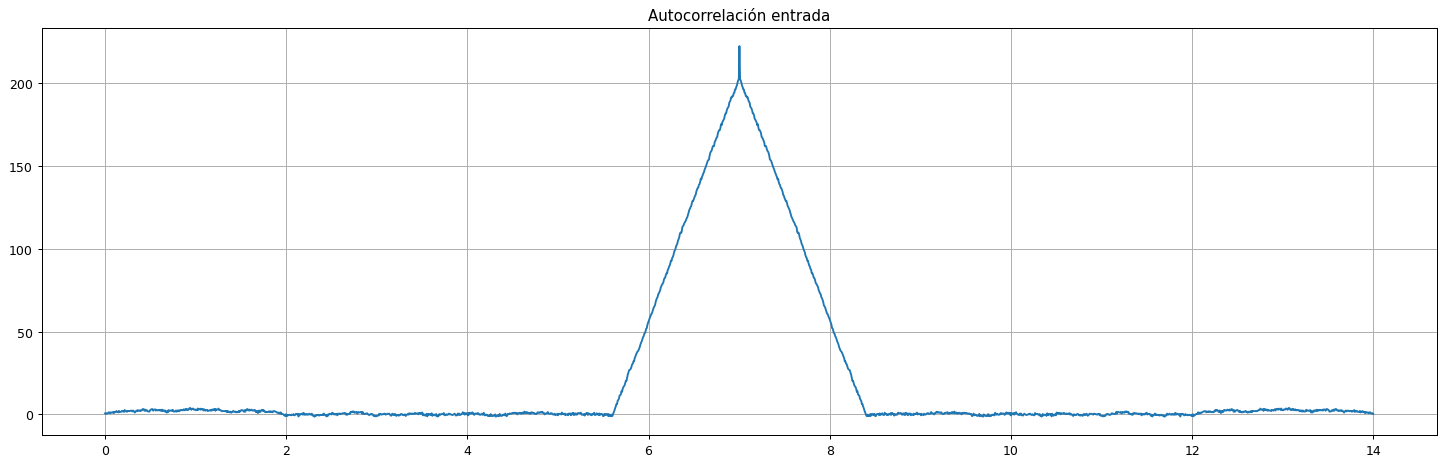

In [140]:
#Autocorrelación entrada
acorrelationen = signal.correlate(inputn,inputn,mode='same')
plt.title("Autocorrelación entrada")
plt.plot(t,acorrelationen)
plt.grid()

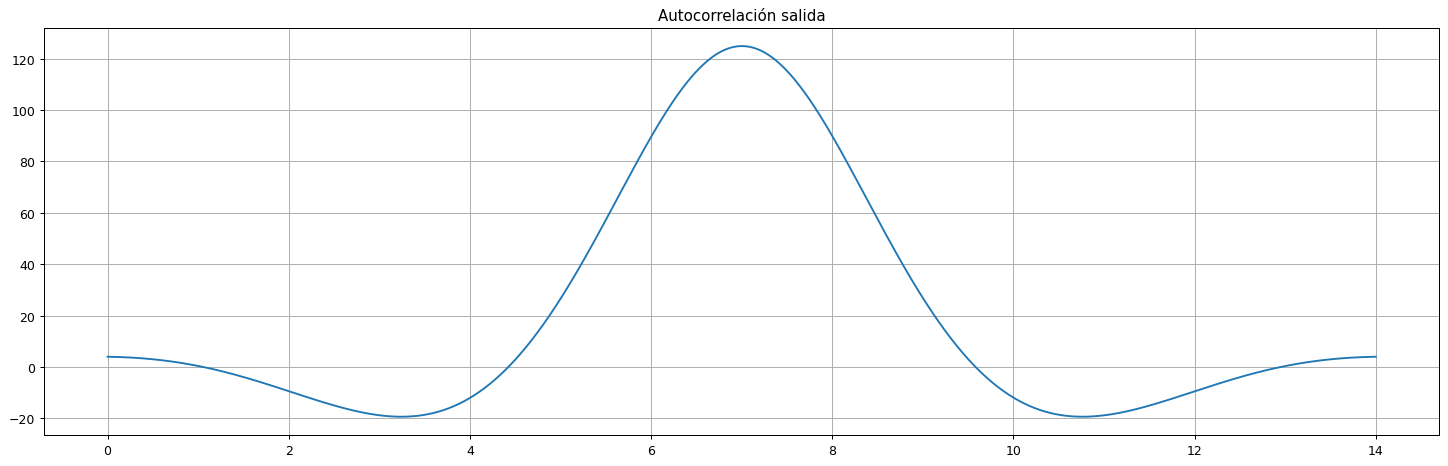

In [141]:
#Autocorrelación salida
acorrelationsn = signal.correlate(output_sn,output_sn,mode='same')
plt.title("Autocorrelación salida")
plt.plot(t,acorrelationsn)
plt.grid()

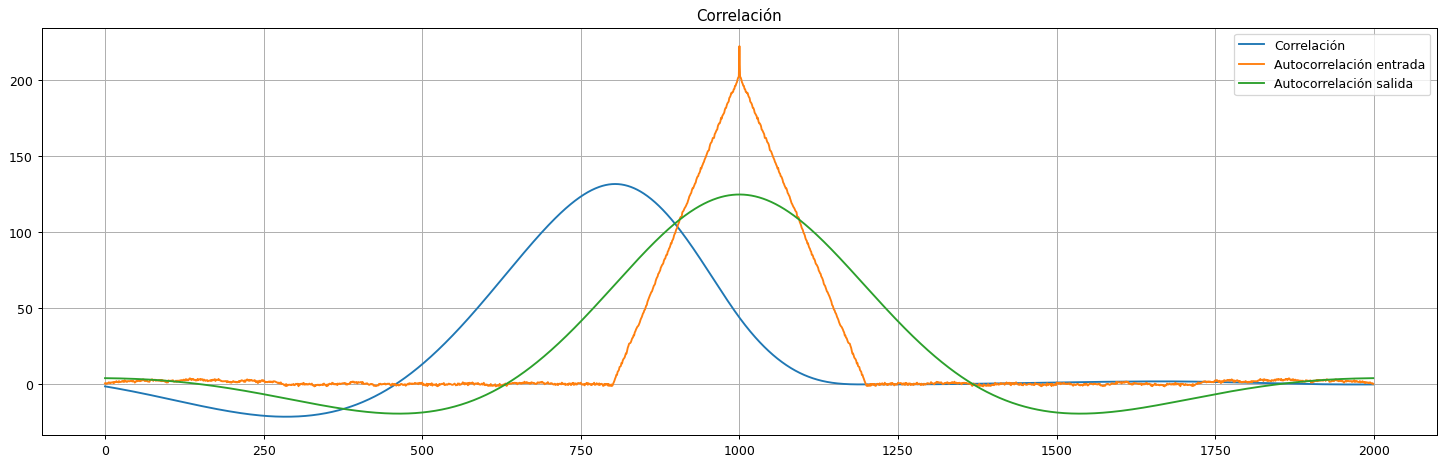

In [142]:
#Correlación 
correlationcn = signal.correlate(inputn,output_sn,mode='same')
plt.title("Correlación")
plt.plot(correlationcn, label='Correlación')
plt.plot(acorrelationen, label='Autocorrelación entrada')
plt.plot(acorrelationsn, label='Autocorrelación salida')
plt.legend()
plt.grid()

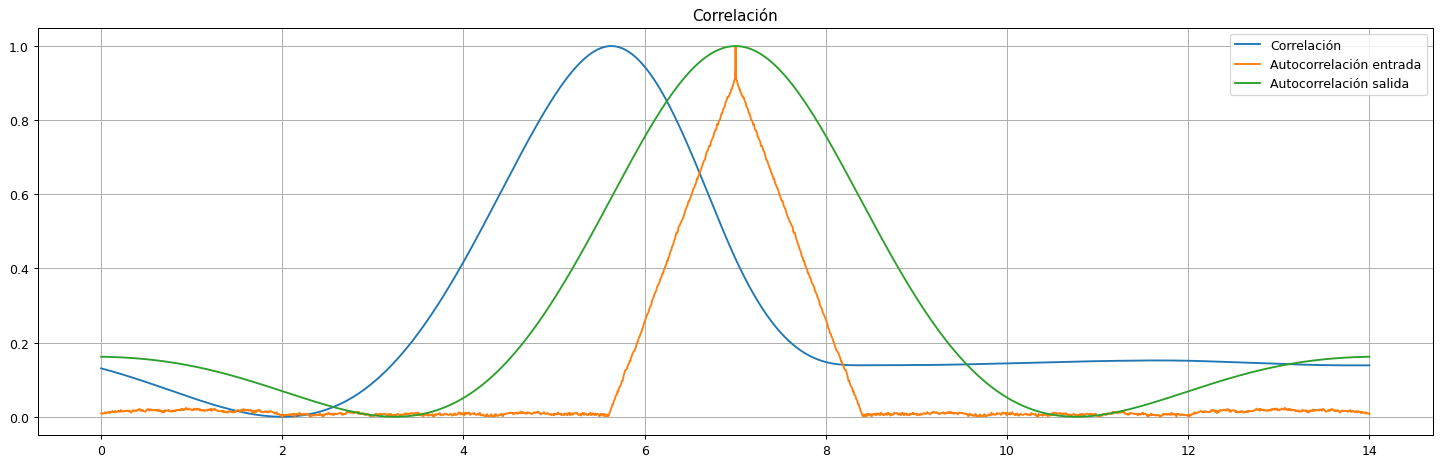

In [143]:
#Correlación normalizada
correlationcnn = signal.correlate(inputn,output_sn,mode='same')
plt.title("Correlación")
cnn=normalization(correlationcnn)
acen=normalization(acorrelationen)
acsn=normalization(acorrelationsn)
plt.plot(t,cnn, label='Correlación')
plt.plot(t,acen, label='Autocorrelación entrada')
plt.plot(t,acsn, label='Autocorrelación salida')
plt.legend()
plt.grid()

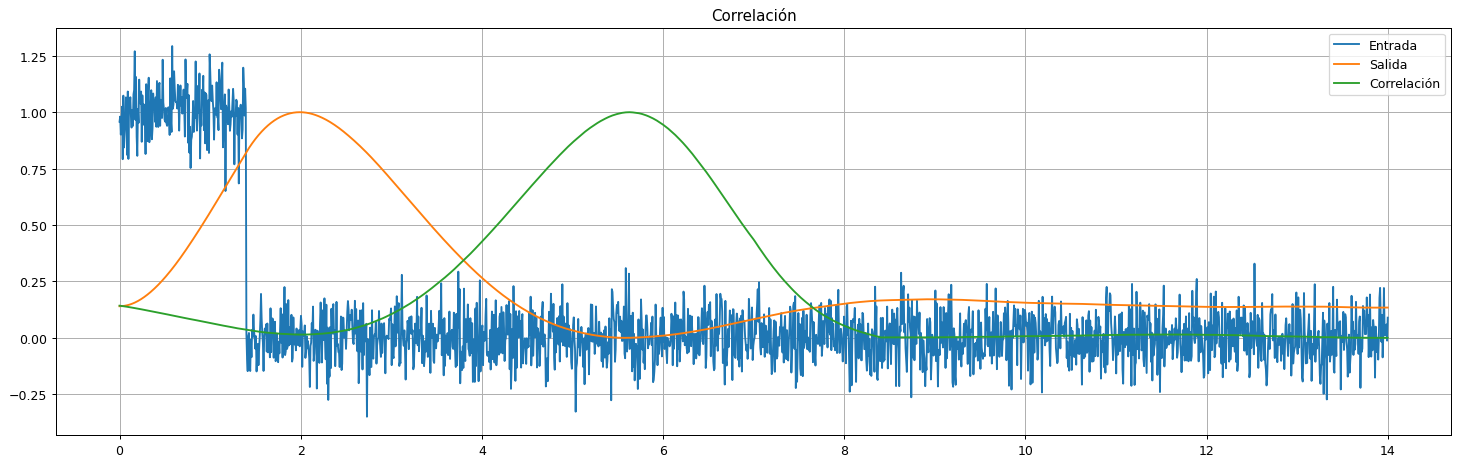

In [144]:
#Correlación viendo entrada y salida
correlationn = np.correlate(inputn,normalization(output_sn), mode='same')
cn=normalization(correlationn)
plt.title("Correlación")
plt.plot(t,inputn, label='Entrada') 
plt.plot(t,normalization(output_sn), label='Salida') 
plt.plot(t,cn, label='Correlación')
plt.legend()
plt.grid()

In [145]:
#Indice correlación  
import scipy.stats
scipy.stats.spearmanr(inputn, output_sn)

SpearmanrResult(correlation=0.13111076527769133, pvalue=3.975567356078061e-09)

In [146]:
#Indice autocorrelación entrada 
import scipy.stats
scipy.stats.spearmanr(inputn, inputn)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [147]:
#Indice autocorrelación salida
import scipy.stats
scipy.stats.spearmanr(output_sn, output_sn)

SpearmanrResult(correlation=1.0, pvalue=0.0)

##Demodulación de AM

###Demodulación con señal sin ruido

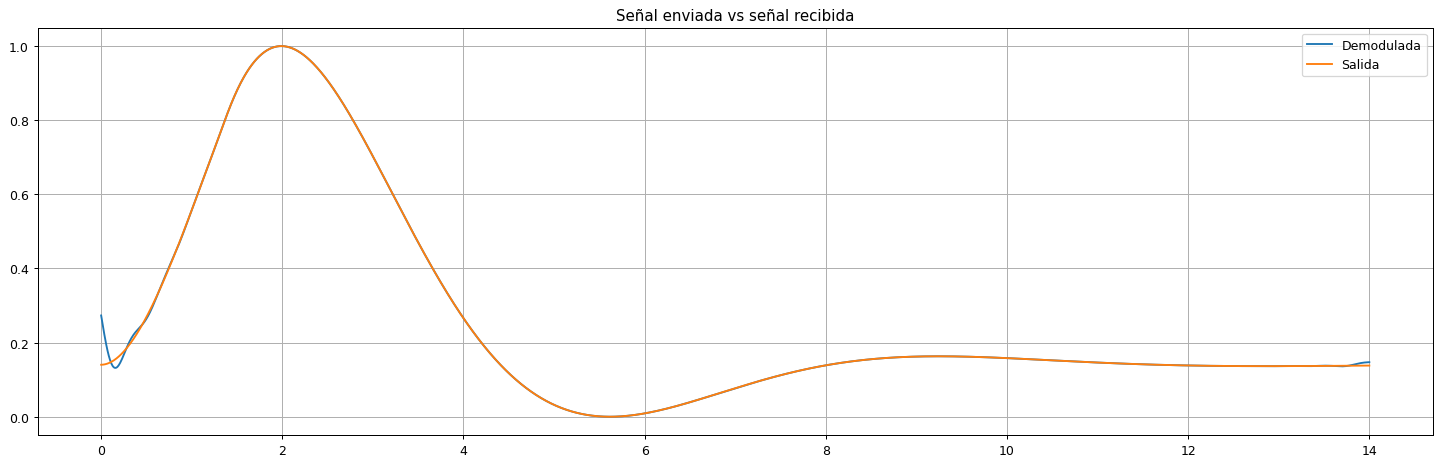

In [148]:
#Modulación am sin ruido
u=1
am = u*l*portadora

#Demodulación am sin ruido
Dam= am * portadora
import plotly.graph_objects as go
cutoff=20
fs=1000
order=8
y = butter_lowpass_filter(Dam, cutoff, fs, order)
AMD=2*y
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = AMD,
            line =  dict(shape =  'spline' ),
            name = 'Señal demodulada'
            ))
fig.add_trace(go.Scatter(
            y = am,
            line =  dict(shape =  'spline' ),
            name = 'Señal original'
            ))
fig.show()

#Comparación demodulada vs salida am
plt.plot(t,AMD, label='Demodulada')
plt.plot(t,l, label='Salida')
plt.title('Señal enviada vs señal recibida')
plt.legend()
plt.grid()

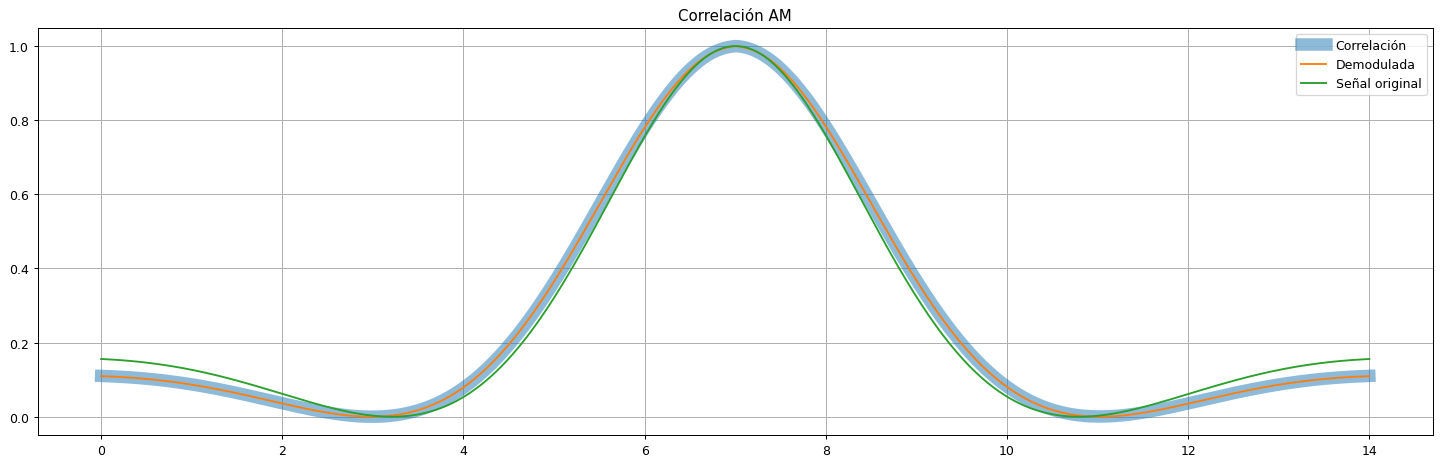

In [149]:
#Correlación am sin ruido
correlationam = signal.correlate(l,AMD,mode='same')
acorrelationdam = signal.correlate(y,y,mode='same')
cam=normalization(correlationam)
acam=normalization(acorrelationdam)
plt.title("Correlación AM")
plt.plot(t,cam, label='Correlación', linewidth=10, alpha=0.5)
plt.plot(t,acam, label='Demodulada')
plt.plot(t,acs, label='Señal original')
plt.legend()
plt.grid()

###Demodulación con señal + ruido gaussiano

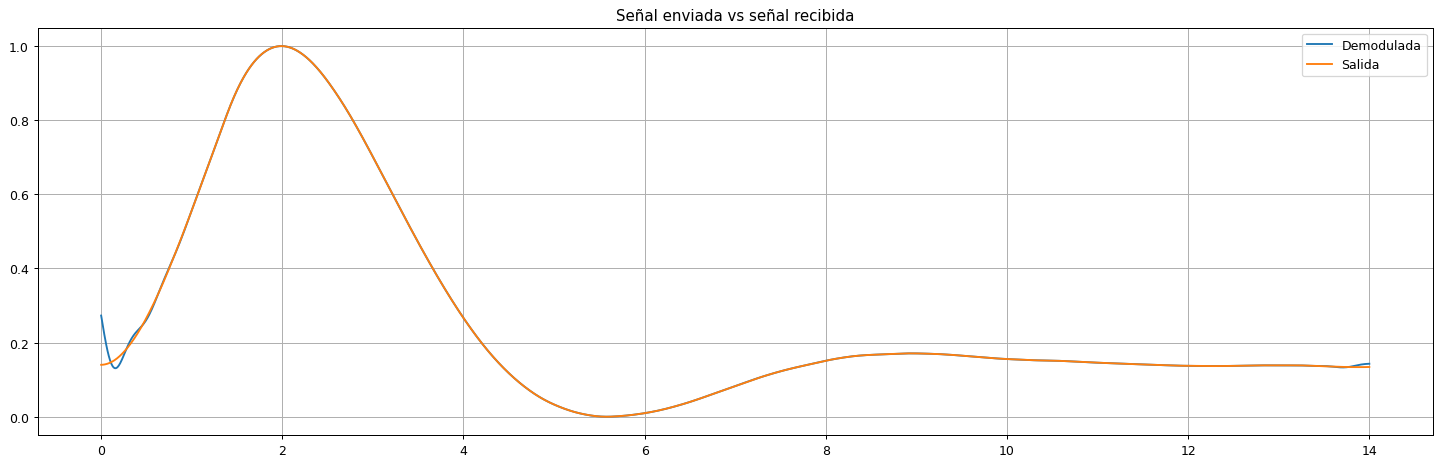

In [150]:
#Modulación am sin ruido
u=1
amn = u*normalization(output_sn)*portadora

#Demodulación am sin ruido
Damn= amn * portadora
import plotly.graph_objects as go
cutoff=20
fs=1000
order=8
y = butter_lowpass_filter(Damn, cutoff, fs, order)
AMD=2*y
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = AMD,
            line =  dict(shape =  'spline' ),
            name = 'Señal demodulada'
            ))
fig.add_trace(go.Scatter(
            y = amn,
            line =  dict(shape =  'spline' ),
            name = 'Señal original'
            ))
fig.show()

#Comparación demodulada vs salida am
plt.plot(t,AMD, label='Demodulada')
plt.plot(t,normalization(output_sn), label='Salida')
plt.title('Señal enviada vs señal recibida')
plt.legend()
plt.grid()

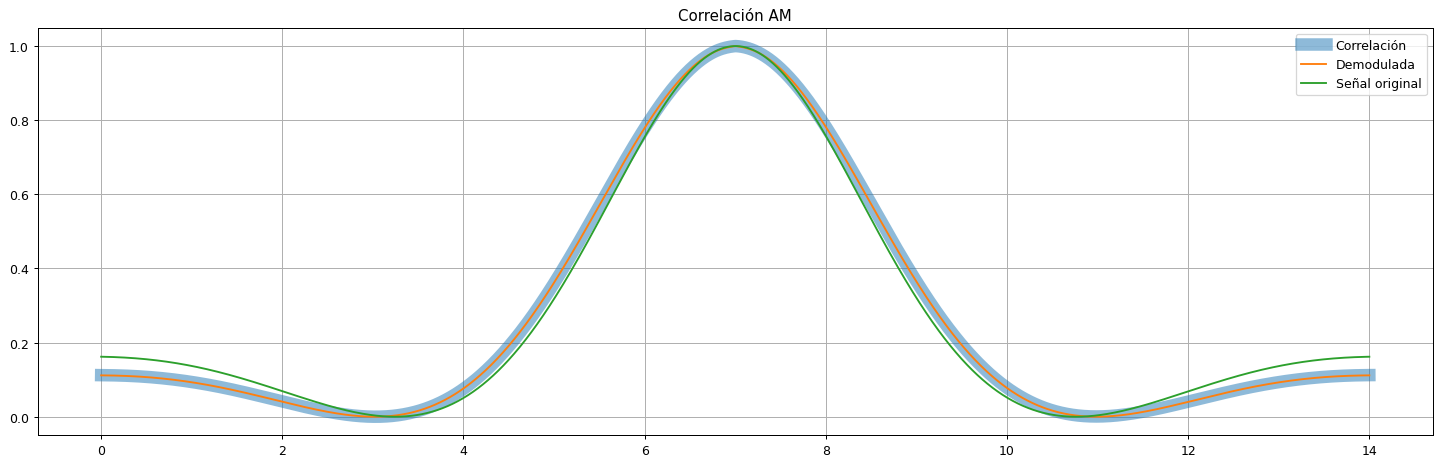

In [151]:
#Correlación am
no=normalization(output_sn)
correlationam = signal.correlate(no,AMD,mode='same')
acorrelationdam = signal.correlate(y,y,mode='same')
cam=normalization(correlationam)
acam=normalization(acorrelationdam)
plt.title("Correlación AM")
plt.plot(t,cam, label='Correlación', linewidth=10, alpha=0.5)
plt.plot(t,acam, label='Demodulada')
plt.plot(t,acsn, label='Señal original')
plt.legend()
plt.grid()